In [1]:
!pip install pymoo

$$ \min f_1(\mathbf{x}) = x_1^2+x_2^2+x_3^2 \\
\max f_2(\mathbf{x}) = -(x_1-1)^2-(x_2-4)^2-(x_3-3)^2\\
\text{s.t.}\\
g_1(\mathbf{x}) = x_1+x_2-x_3 \leq 1\\
g_2(\mathbf{x}) = 3x_1-x_2-x_3 \geq 4\\
-10\leq x_i \leq 10 \quad \forall i
$$

# Codificacion de la clase en Python

La libreria PyMOO requiere que el problema de optimizacion sea definido por medio de una clase de Python.

In [2]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem

In [3]:
class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_ieq_constr=2,
                         xl=np.array([-2,-2]),
                         xu=np.array([2,2]))

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 100 * (x[0]**2 + x[1]**2)
        f2 = (x[0]-1)**2 + x[1]**2

        g1 = 2*(x[0]-0.1) * (x[0]-0.9) / 0.18
        g2 = - 20*(x[0]-0.4) * (x[0]-0.6) / 4.8

        out["F"] = [f1, f2]
        out["G"] = [g1, g2]


problem = MyProblem()

* Si desea conocer los algoritmos implementados en la libreria PyMOO, ver https://pymoo.org/algorithms/list.html
* Para este ejemplo usaremos Non-dominated Sorting Genetic Algorithm (NSGA-II). https://pymoo.org/algorithms/moo/nsga2.html

# Inicializar el algoritmo
Importamos las funciones que se emplearan para construir el algoritmo de optimización.

In [4]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling

Definimos el algoritmo NSGA2

In [5]:
algorithm = NSGA2(
    pop_size=40,
    n_offsprings=10,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)

Tambien debemos definir el criterio de parada del algoritmo, para este ejemplo usamos la cantidad de generaciones (iteraciones)

In [6]:
from pymoo.termination import get_termination
termination = get_termination("n_gen",40)

# Proceso de optimización



In [7]:
from pymoo.optimize import minimize

res = minimize(problem,
               algorithm,
               termination,
               seed = 1,
               save_history=True,
               verbose = True)
X = res.X
F = res.F

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       40 |      1 |  0.000000E+00 |  2.363992E+01 |             - |             -
     2 |       50 |      1 |  0.000000E+00 |  1.239636E+01 |  0.000000E+00 |             f
     3 |       60 |      2 |  0.000000E+00 |  5.4620972973 |  1.0000000000 |         ideal
     4 |       70 |      2 |  0.000000E+00 |  2.3938570636 |  0.000000E+00 |             f
     5 |       80 |      2 |  0.000000E+00 |  1.1200787779 |  0.000000E+00 |             f
     6 |       90 |      3 |  0.000000E+00 |  0.1858089725 |  0.1785481247 |             f
     7 |      100 |      4 |  0.000000E+00 |  0.0096392745 |  0.0639961700 |         ideal
     8 |      110 |      6 |  0.000000E+00 |  0.0016302512 |  0.0912676400 |         ideal
     9 |      120 |      7 |  0.000000E+00 |  0.000000E+00 |  0.0246228920 |             f
    10 |      130 |      6 |  0.000000E+00 |  0.000000E+00 |  0.1055074321 |         ideal

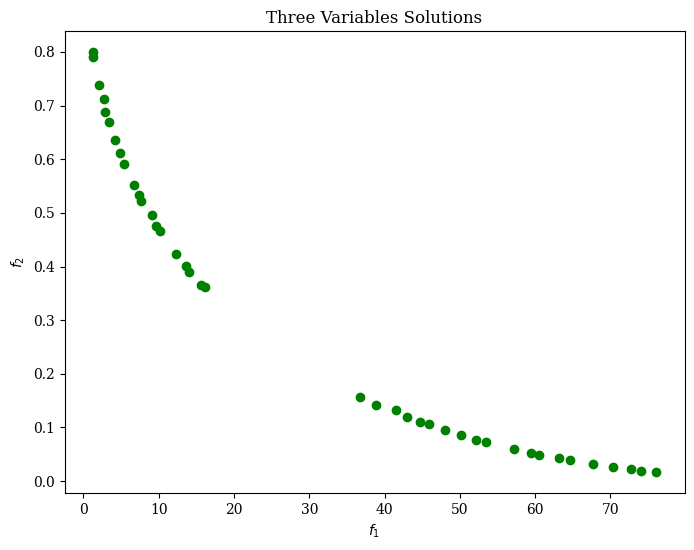

In [8]:
from pymoo.visualization.scatter import Scatter

plot = Scatter(title = "Three Variables Solutions")
plot.add(res.F, color = "green")
plot.show()